In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data=pd.read_csv("breastCancer.csv")
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Converting the class from 4 and 2 to  1 and 0 respectively

In [3]:
data['class'].unique()

array([2, 4], dtype=int64)

In [4]:
data['class'].value_counts()

class
2    458
4    241
Name: count, dtype: int64

In [5]:
data['class'] = data['class'].replace(2,0)

In [6]:
data['class'] = data['class'].replace(4,1)

In [7]:
data['class'].unique()

array([0, 1], dtype=int64)

Checking min and max for variables 


In [8]:
columns_to_analyze = ['clump_thickness','size_uniformity', 'shape_uniformity', 'marginal_adhesion', 'epithelial_size', 
                      'bare_nucleoli', 'bland_chromatin', 'normal_nucleoli', 'mitoses']

# Iterate through each column and print the minimum and maximum values
for column in columns_to_analyze:
    print(f"Minimum {column}: {data[column].min()}")
    print(f"Maximum {column}: {data[column].max()}")
    print()

Minimum clump_thickness: 1
Maximum clump_thickness: 10

Minimum size_uniformity: 1
Maximum size_uniformity: 10

Minimum shape_uniformity: 1
Maximum shape_uniformity: 10

Minimum marginal_adhesion: 1
Maximum marginal_adhesion: 10

Minimum epithelial_size: 1
Maximum epithelial_size: 10

Minimum bare_nucleoli: 1
Maximum bare_nucleoli: ?

Minimum bland_chromatin: 1
Maximum bland_chromatin: 10

Minimum normal_nucleoli: 1
Maximum normal_nucleoli: 10

Minimum mitoses: 1
Maximum mitoses: 10



In [9]:

print(data['bare_nucleoli'].max())

?


**Exploratory Data Analysis**

In [10]:
data.dtypes #checking the data types of each column

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [11]:

data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [12]:
data['bare_nucleoli'].isna().sum()

0

In [13]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                               2
dtype: object

In [14]:
digits_in_bare_nucleoli= pd.DataFrame(data.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [15]:
df= data.replace('?', np.nan)

In [16]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

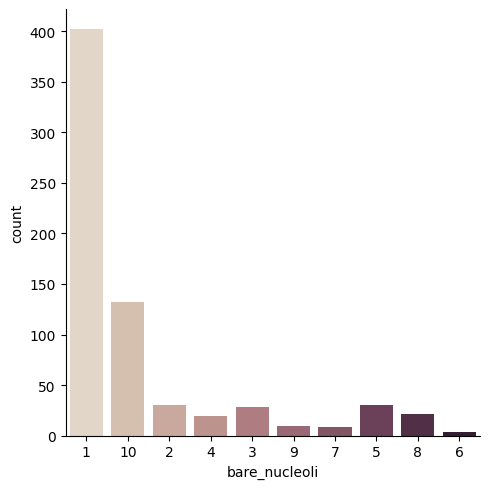

In [17]:
sns.catplot(x="bare_nucleoli", kind="count", palette="ch:.25", data=df)

In [18]:

df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      0.0
dtype: object

In [19]:
df = df.fillna(df.median())

In [20]:
df.isna().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [21]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [22]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [23]:
#dropping the index of the dataset

df.drop('id', axis=1, inplace=True)

Univariate Data Analysis of the **Class** column

C:\Users\Asus\AppData\Local\Temp\ipykernel_2892\729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

<Axes: xlabel='class', ylabel='Density'>

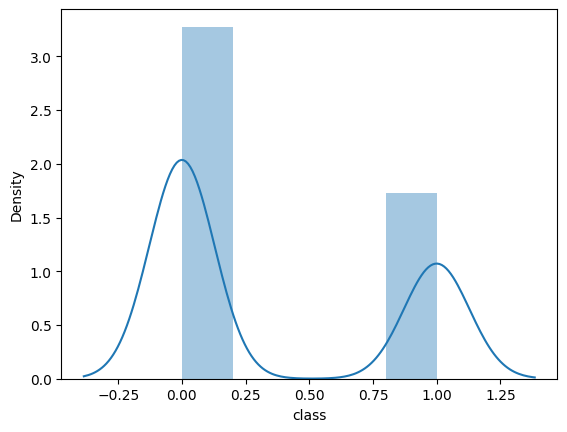

In [24]:
sns.distplot(df['class'])

Multivariate Data Analysis

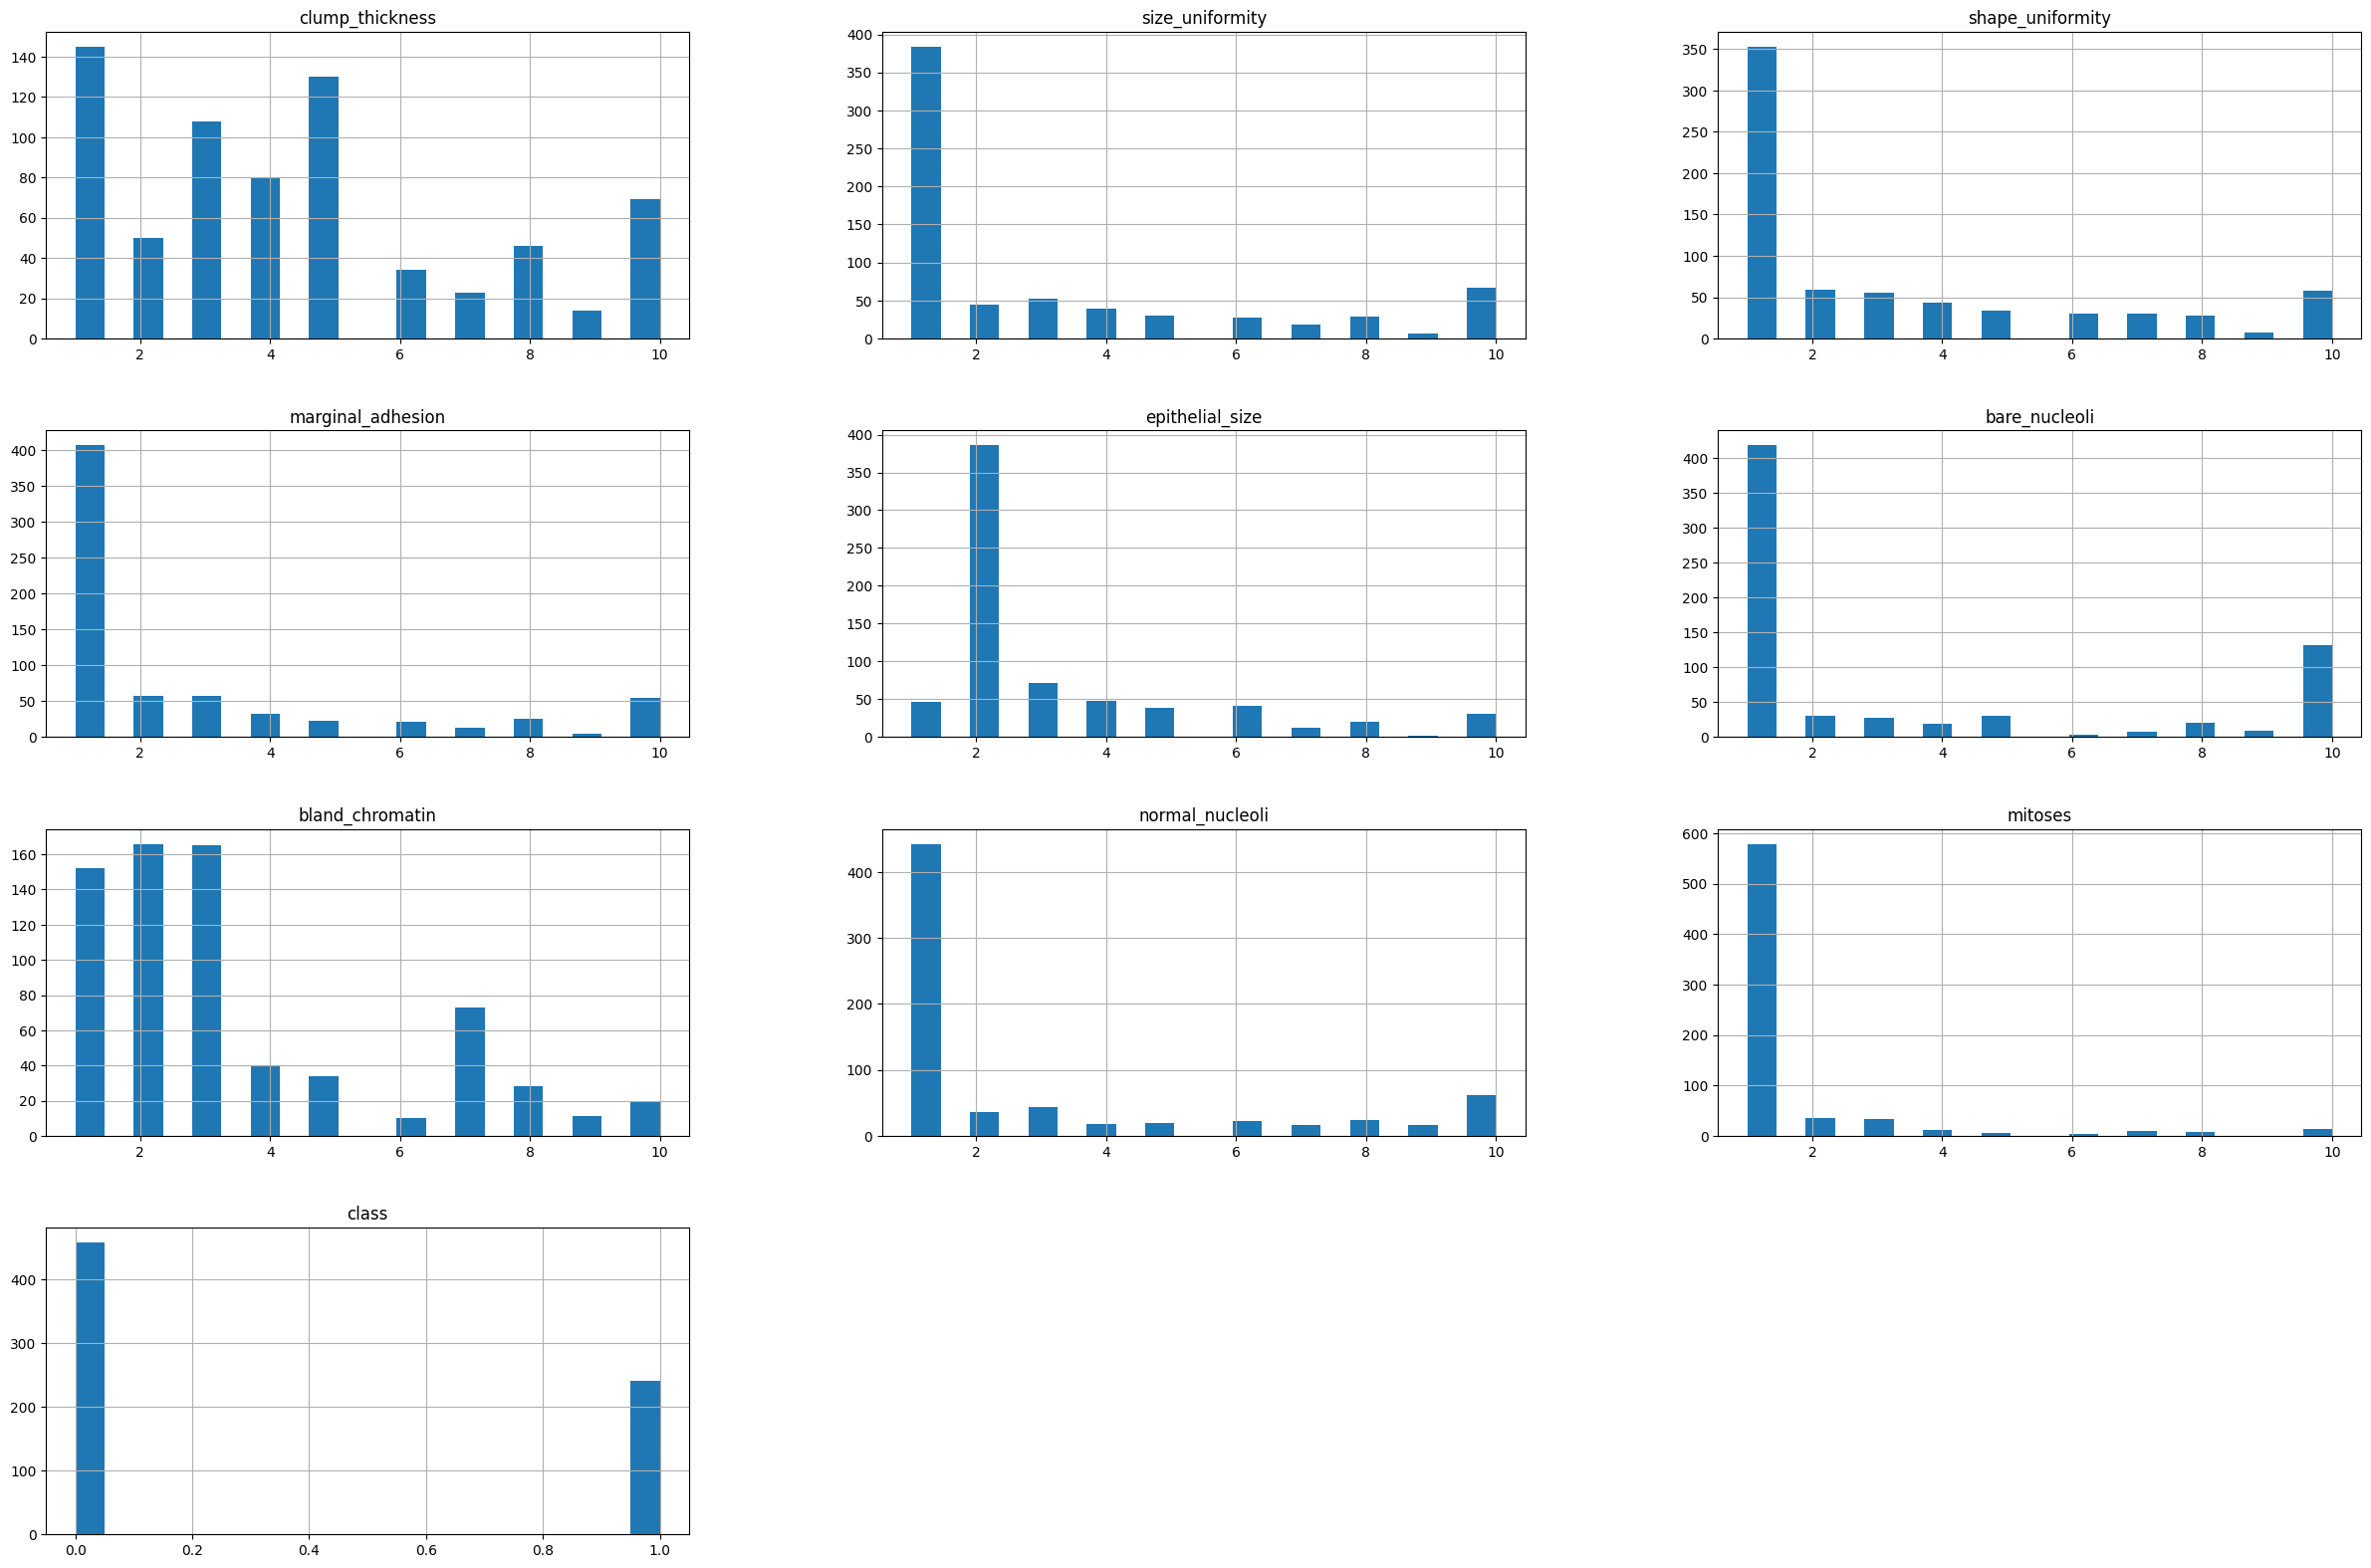

In [25]:
df.hist(bins=20, figsize=(30,30), layout=(6,3));

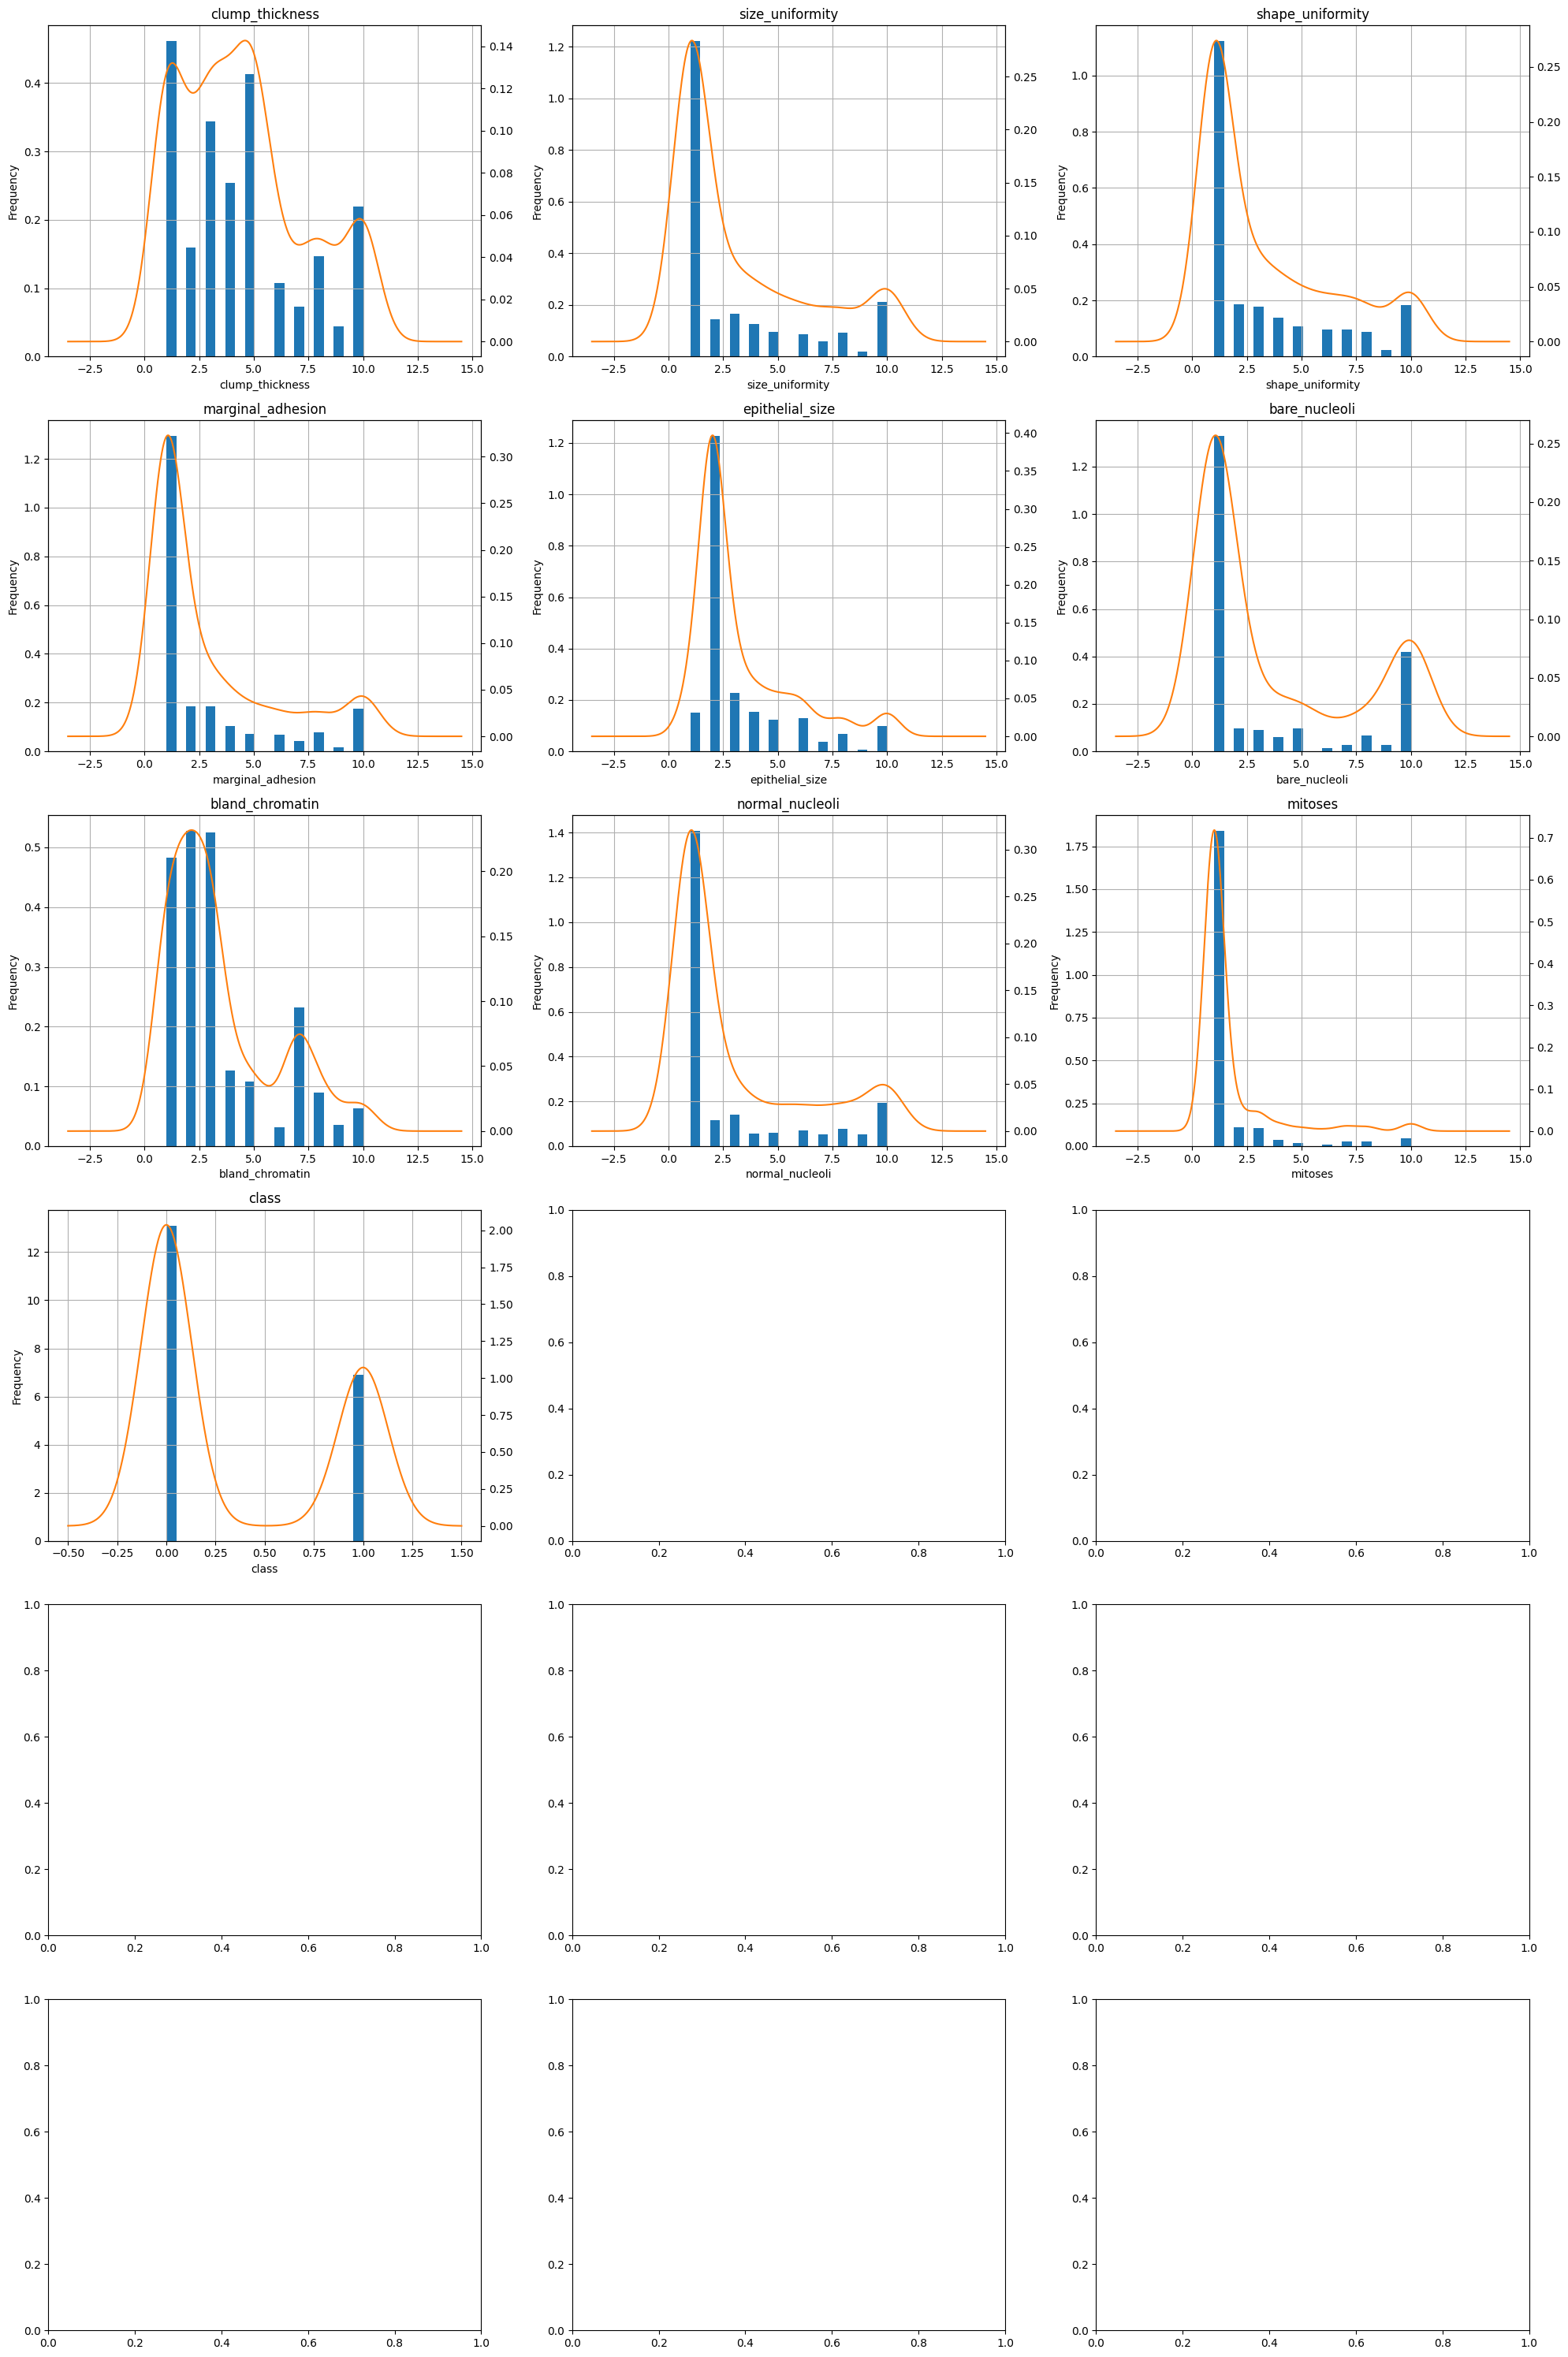

In [26]:
import matplotlib.pyplot as plt


# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column and create a histogram with KDE
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, density=True)
    df[column].plot(kind='kde', ax=axes[i], secondary_y=True)

    # Set labels and titles
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


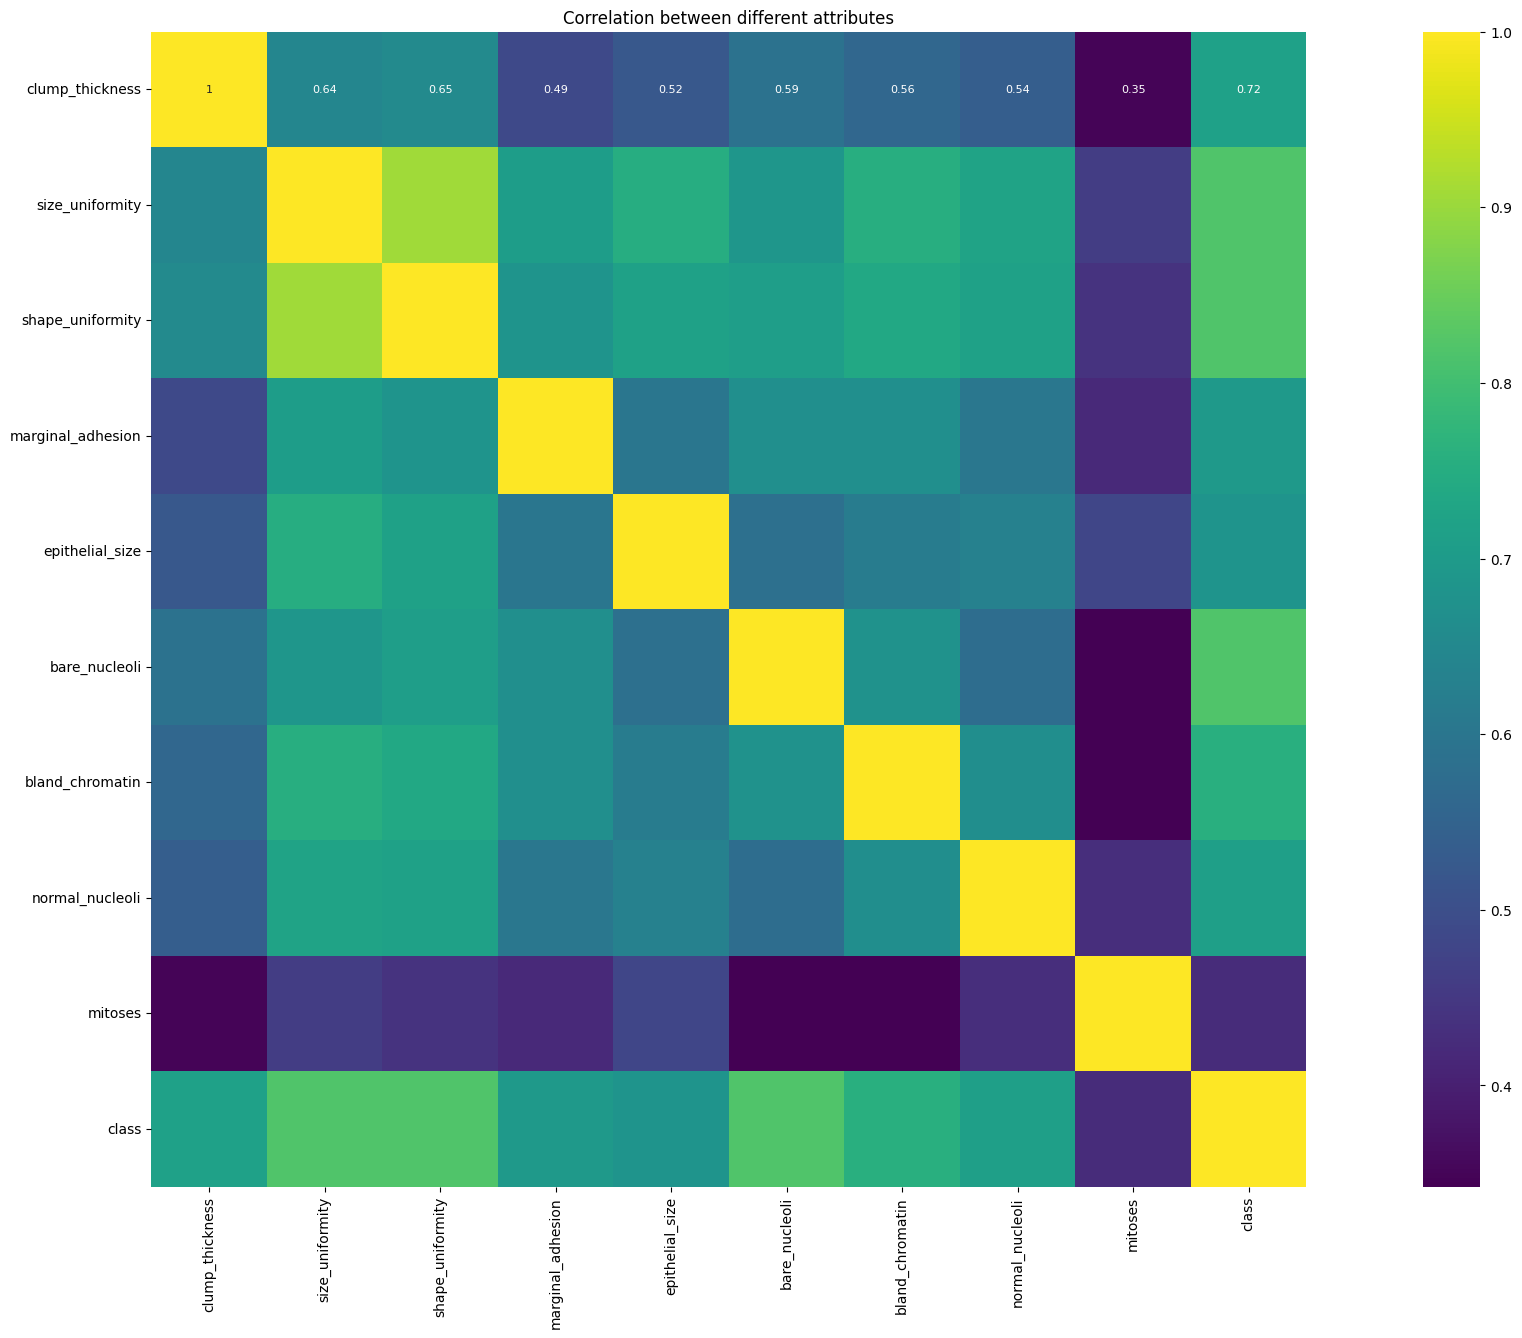

In [28]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis', annot_kws={"size": 8})
plt.title('Correlation between different attributes')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

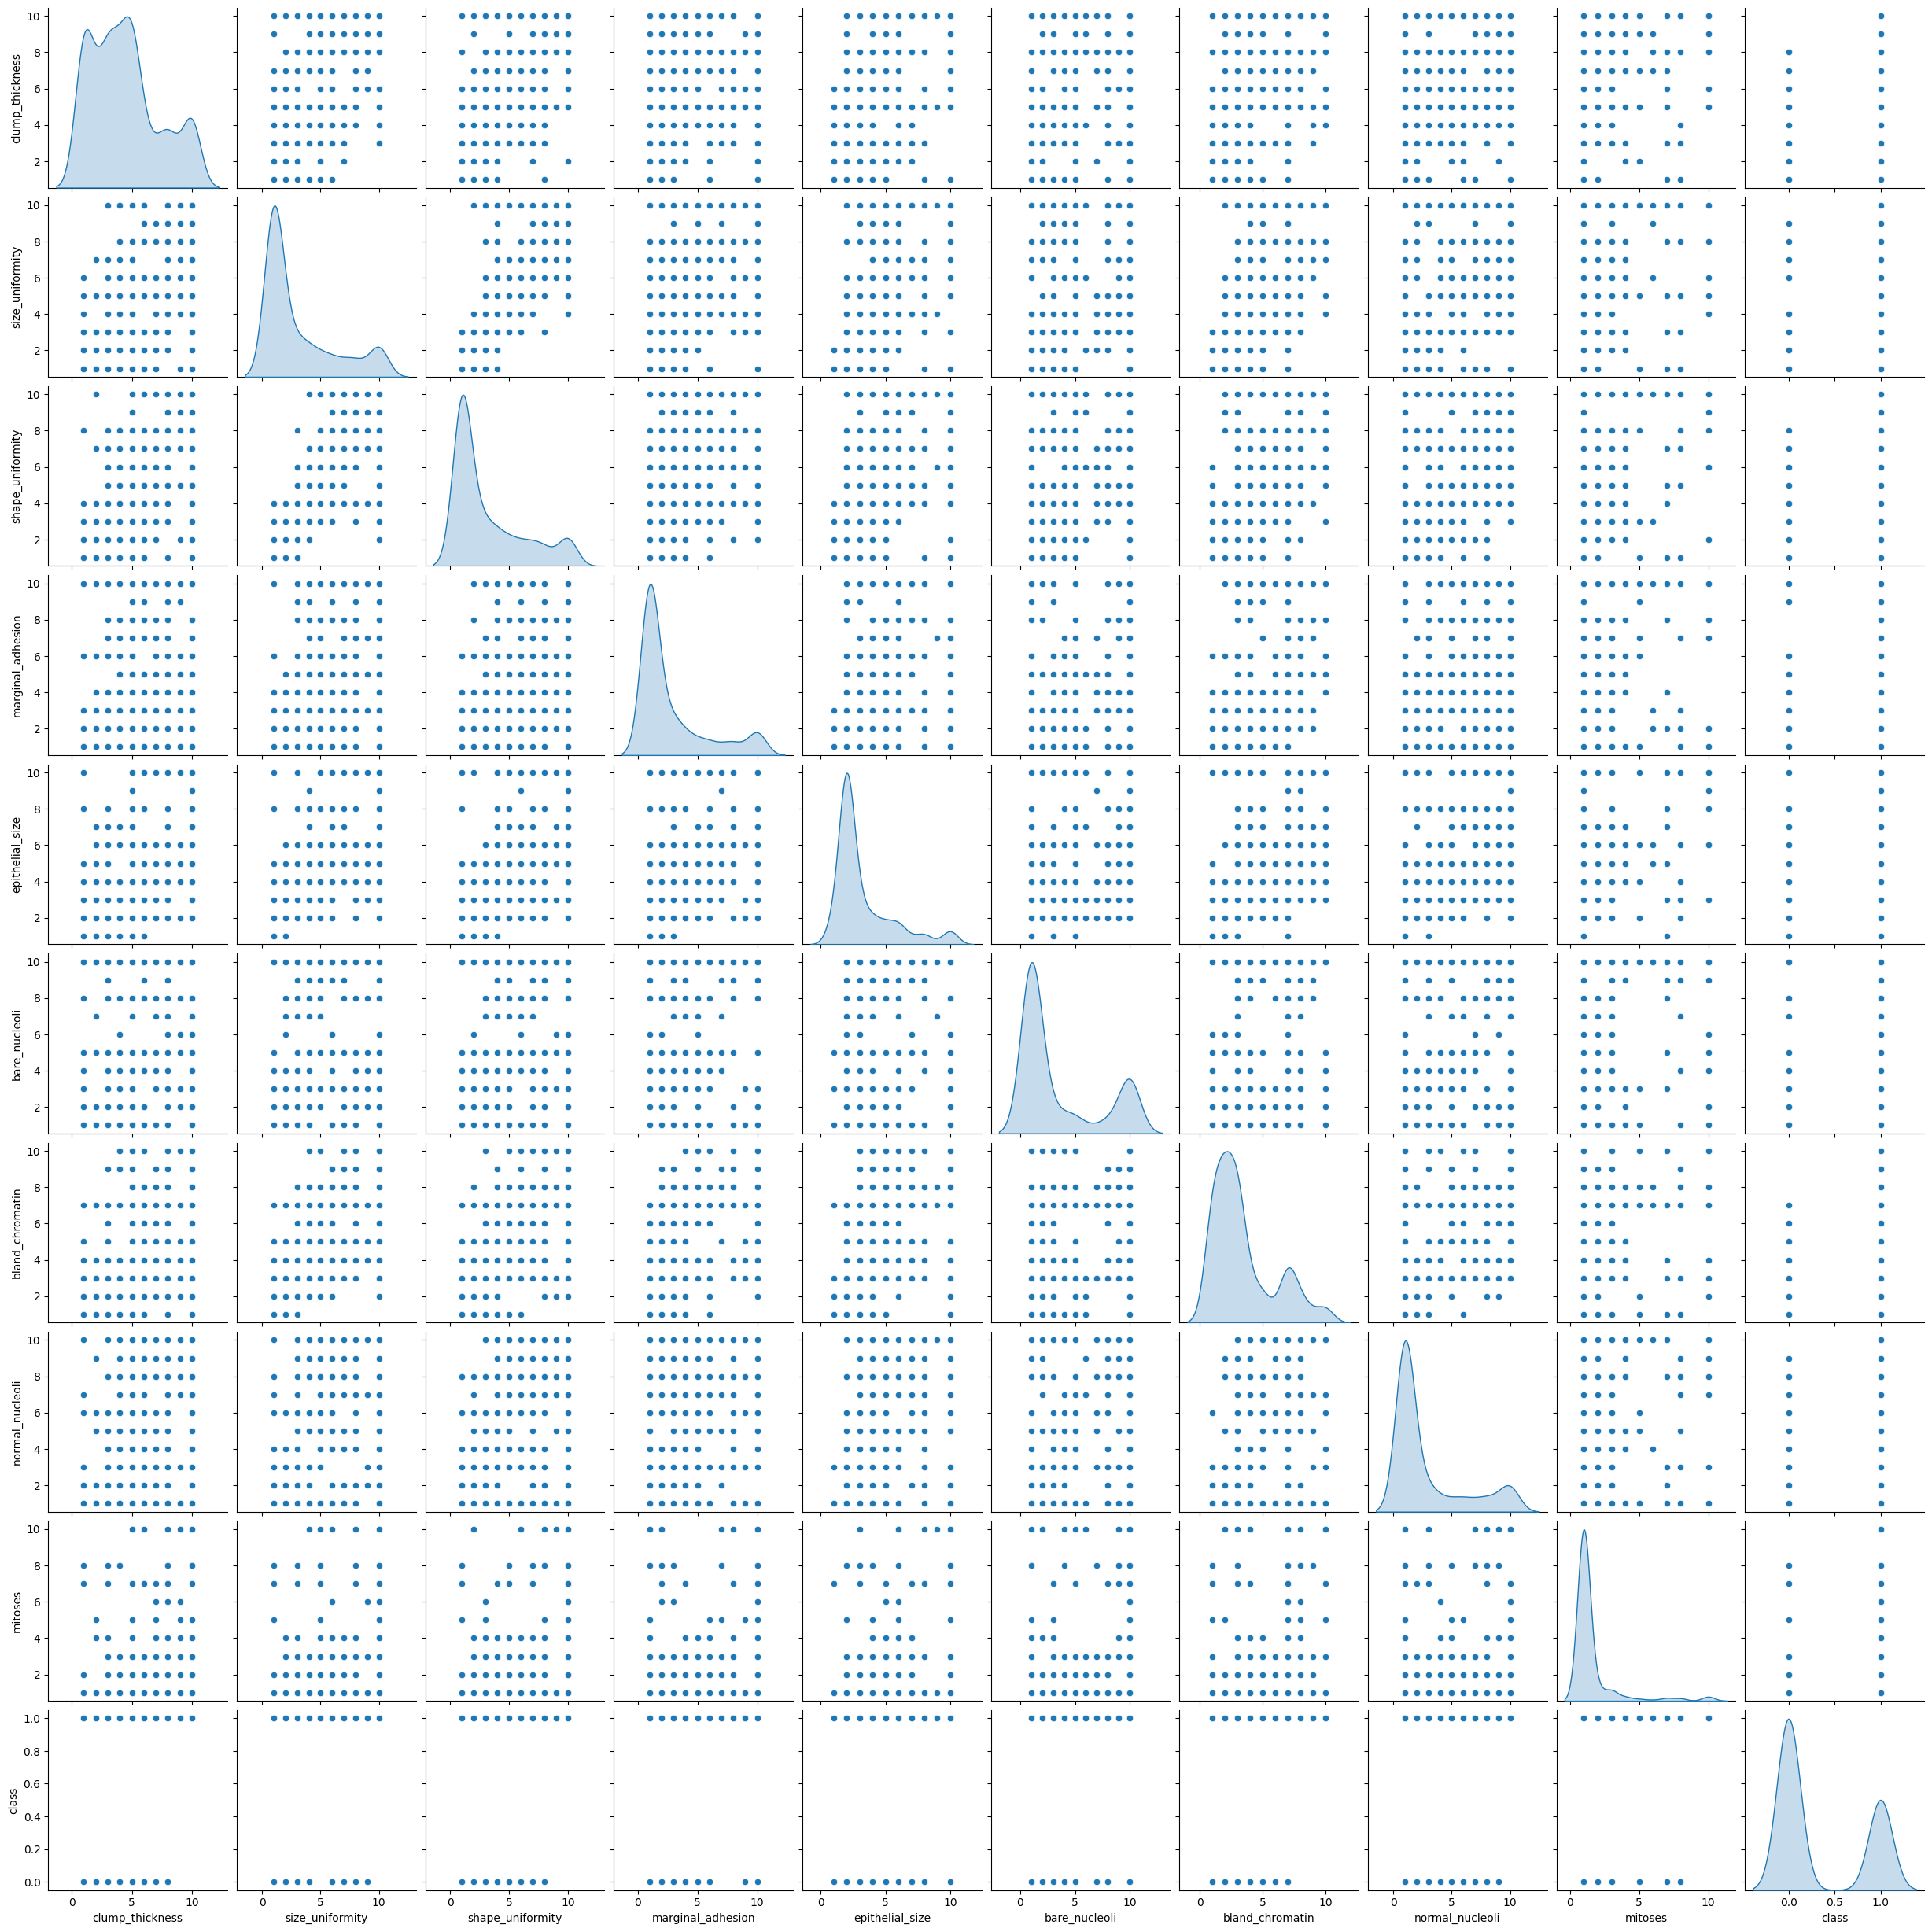

In [29]:
sns.pairplot(df, diag_kind="kde")

<br>


**Building Our Model**

In [30]:
# Dividing our dataset into training and testing set

X = df.drop('class', axis=1)
y = df['class']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

1.**KNeighborsClassifier**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [33]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [34]:
X_test

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
584,5,1,1,6,3,1,1,1,1
417,1,1,1,1,2,1,2,1,1
606,4,1,1,2,2,1,1,1,1
349,4,2,3,5,3,8,7,6,1
134,3,1,1,1,3,1,2,1,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10,10,1,1
299,9,1,2,6,4,10,7,7,2
577,1,1,1,1,2,1,2,1,1
103,8,2,3,1,6,3,7,1,1


In [35]:
predicted_1 = KNN.predict(X_test)
predicted_1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [36]:
from scipy.stats import zscore

print('KNeighborsClassifier Agorithm is predicting at {0:.2g}%'.format(KNN.score(X_test, y_test)*100))


KNeighborsClassifier Agorithm is predicting at 98%


In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

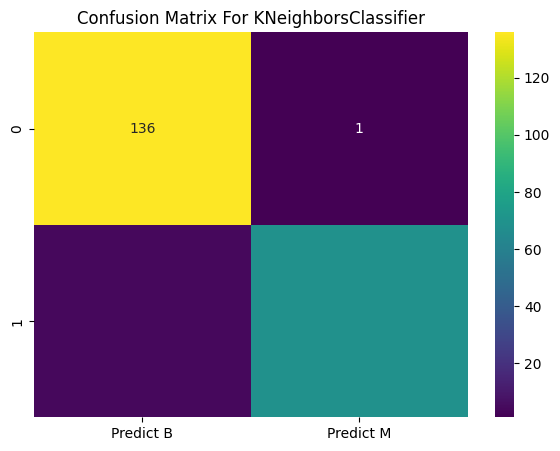

In [38]:
from sklearn import metrics

# Assuming 'predicted_1' contains predictions
cm = metrics.confusion_matrix(y_test, predicted_1)

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, columns=["Predict B", "Predict M"])

plt.figure(figsize=(7, 5))

# Plot the heatmap with annotations
sns.heatmap(df_cm, annot=True, fmt='d', cmap='viridis')

plt.title("Confusion Matrix For KNeighborsClassifier")
plt.show()


In [39]:
from sklearn.svm import SVC


svc= SVC(gamma=0.025, C=3, kernel='linear')
svc.fit(X_train, y_train)

SVC(C=3, gamma=0.025, kernel='linear')

In [40]:
predicted_2 = svc.predict(X_test)
predicted_2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [41]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(X_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 97%


In [42]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)

In [43]:

df1=pd.concat([knnPredictions,svcPredictions],axis=1)

In [44]:

df1.columns=[['knnPredictions','svcPredictions']]

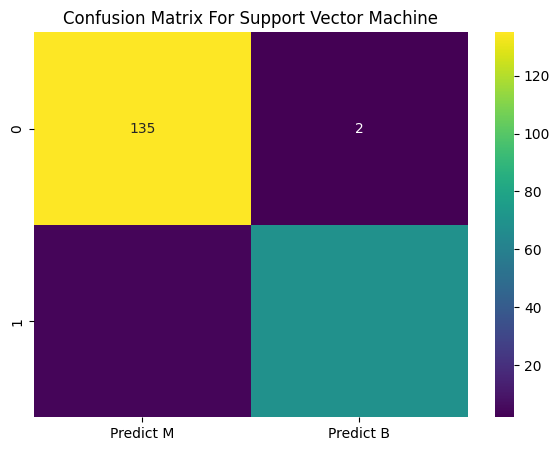

In [45]:
from sklearn import metrics

# Assuming 'predicted_2' contains predictions from the SVM model
cm = metrics.confusion_matrix(y_test, predicted_2, labels=[0, 1])

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, index=[0,1], columns=["Predict M", "Predict B"])

plt.figure(figsize=(7, 5))

# Plot the heatmap with annotations
sns.heatmap(df_cm, annot=True, fmt='d', cmap='viridis')

plt.title("Confusion Matrix For Support Vector Machine")
plt.show()


###**Feature Importance**

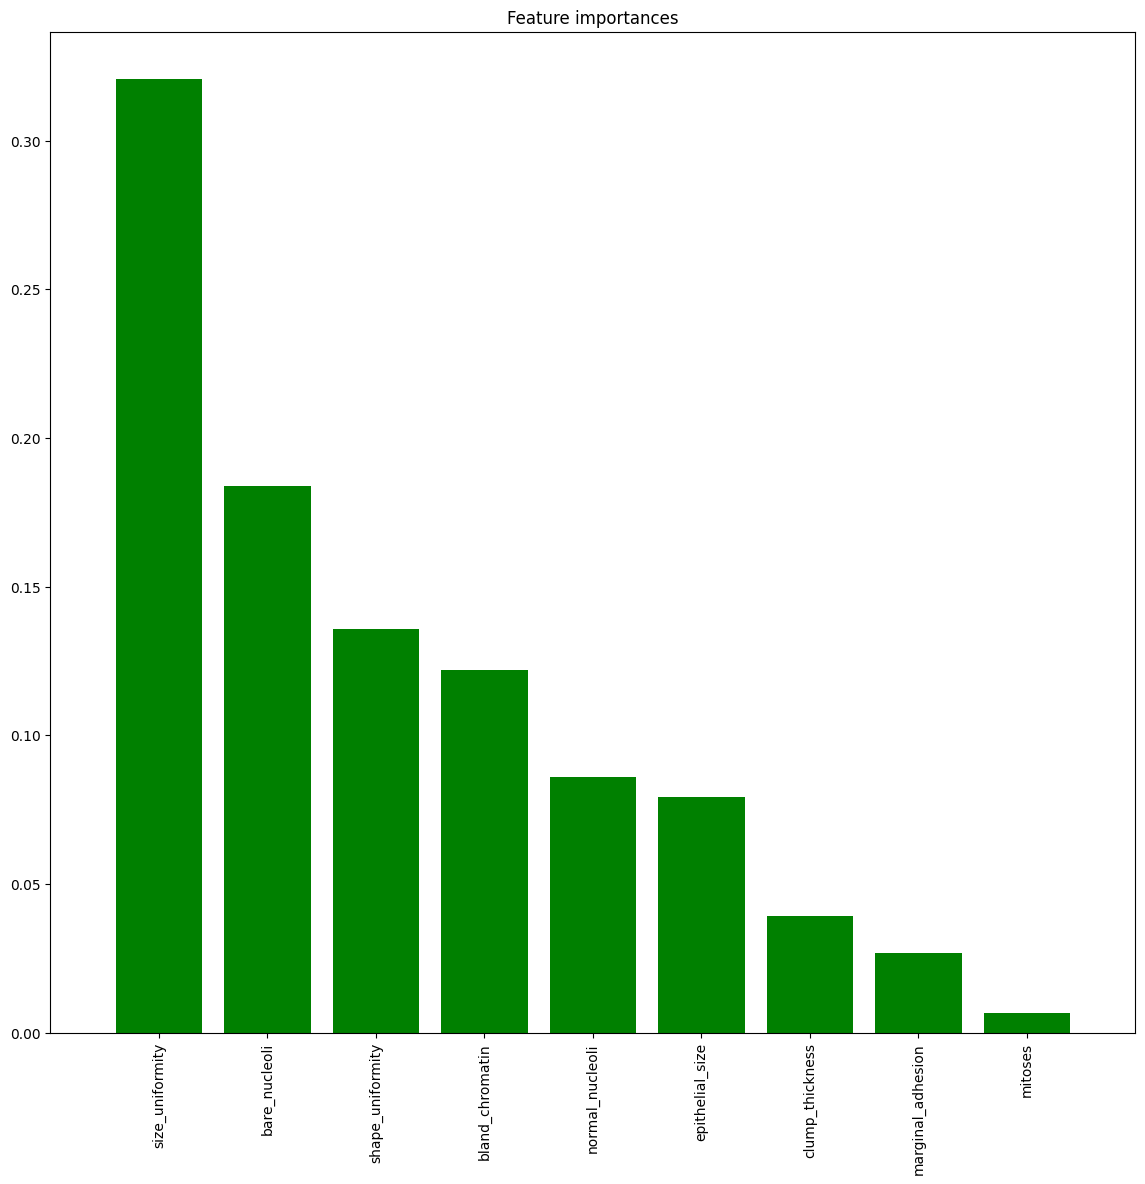

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()      
rf = rf.fit(X_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g",  align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [47]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

import pickle

# Creating a pickle file for the classifier
pickle.dump(scaler, open('scaler.pkl', 'wb')) 

In [49]:
SelectedFeatures = df[['size_uniformity','bare_nucleoli','shape_uniformity','bland_chromatin','epithelial_size','normal_nucleoli','clump_thickness','marginal_adhesion','mitoses']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(SelectedFeatures, y, test_size = 0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
import pickle

# Creating a pickle file for the classifier
pickle.dump(svc, open('model.pkl', 'wb')) 